In [63]:
import os
import sys
import os
import json
import math
import numpy as np
import pandas as pd
import rasterio as rio
import tifffile as tif
from collections import defaultdict
from glob import glob
from pathlib import Path
from pydantic import BaseModel, BaseSettings
from typing import List
from datetime import datetime
from tqdm import tqdm
import rasterio
import matplotlib.pyplot as plt

import random
sys.path.append("../")


In [150]:
def imread(path: Path, channels_first: bool = True, return_metadata: bool = False) -> np.ndarray:
    """Wraps rasterio open functionality to read the numpy array and exit the context.
    Args:
        path (Path): path to the geoTIFF image
        channels_first (bool, optional): whether to return it channels first or not. Defaults to True.
    Returns:
        np.ndarray: image array
    """
    with rasterio.open(str(path), mode="r", driver="GTiff") as src:
        image = src.read()
        metadata = src.profile.copy()
    image = image if channels_first else image.transpose(1, 2, 0)
    if return_metadata:
        return image, metadata
    return image


In [101]:
FOLDER_PATH = "/home/gabrielidis/These/flood/mmflood/processed_data/val"

In [171]:
random_file = random.choice(os.listdir(FOLDER_PATH + "/sar/"))
print(random_file)
sar = imread(FOLDER_PATH + "/sar/" + random_file)
mask = imread(FOLDER_PATH + "/mask/" + random_file)[0]
mask.shape, sar.shape

EMSR279-0-7_169_224.tif


((512, 512), (2, 512, 512))

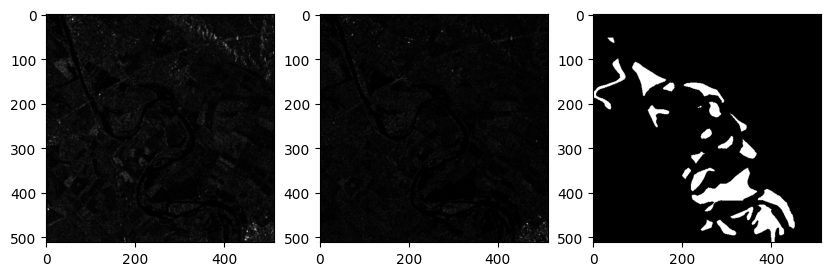

In [172]:
fig, ax = plt.subplots(1,3,figsize = (10,10))
ax[0].imshow(sar[0], cmap = "gray")
ax[1].imshow(sar[1], cmap = "gray")
ax[2].imshow(mask,cmap = "gray")

In [177]:
vv = sar[0]
vh = sar[1]

vvvh = vv - vh

sar2rgb = np.concatenate([(vv,),(vh,),(vvvh,)],axis = 0).transpose((1,2,0))
np.all(sar2rgb[:,:,0] == vv)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


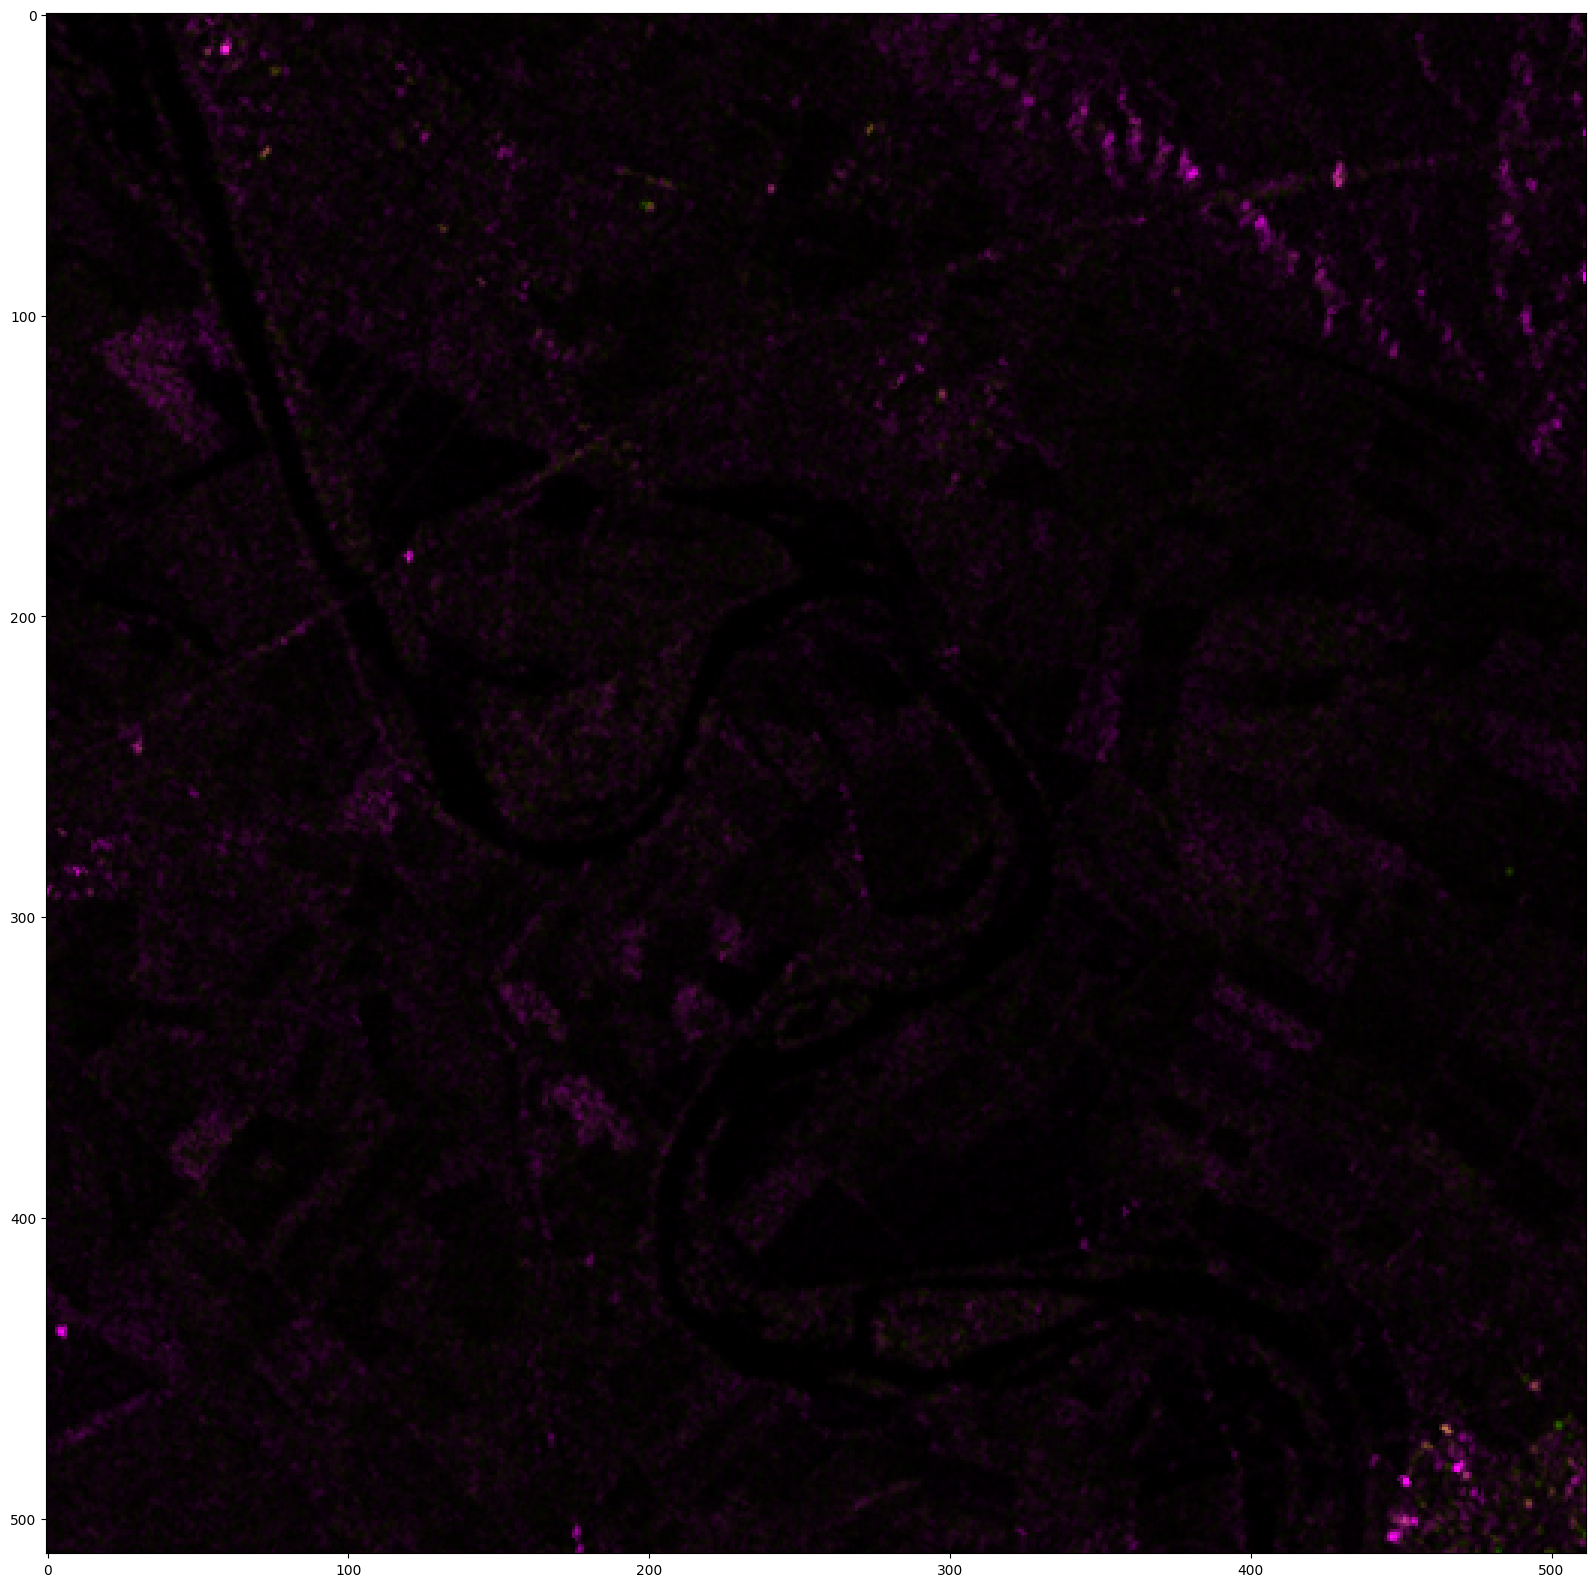

In [178]:
plt.figure(figsize = (20,20))
plt.imshow(sar2rgb)